<font size="4"> <b> • DOMAIN: </b>Botanical Research</font>

<font size="4"> <b> • CONTEXT: </b>University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at
various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo

<font size="4"> <b> • DATA DESCRIPTION: </b>The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/plant-seedlings-classification/data.




<font size="4"> <b> • PROJECT OBJECTIVE: </b> To create a classifier capable of determining a plant's species from a photo.

<b>Steps and tasks: [ Total Score: 30 Marks]</b>
    
<b>1. Import and Understand the data [12 Marks]</b>

>A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]

><i>Hint: You can extract it Manually by losing 2 marks.</i>

>B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]

><i>Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image.</i>

>C. Write a function that will select n random images and display images along with its species. [4 Marks]

><i>Hint: If input for function is 5, it should print 5 random images along with its labels.</i>

<b>2. Data preprocessing [8 Marks]</b>

>A. Create X & Y from the DataFrame. [2 Marks]

>B. Encode labels of the images. [2 Marks]

>C. Unify shape of all the images. [2 Marks]

>D. Normalise all the images. [2 Marks]

<b>3. Model training [10 Marks]</b>

><i>Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.</i>

>A. Split the data into train and test data. [2 Marks]

>B. Create new CNN architecture to train the model. [4 Marks]

>C. Train the model on train data and validate on test data. [2 Marks]

>D. Select a random image and print actual label and predicted label for the same. [2 Marks]

 </font>


In [1]:
import pandas as pd
import io
from google.colab import files
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from glob import glob
import math
import tensorflow as tf
from tensorflow import keras

<font size="5"><p style="color:black"> <b> 1. Import and Understand the data</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.</b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
project_path = "/content/drive/My Drive/Colab Notebooks/"

In [4]:
from zipfile import ZipFile
with ZipFile(project_path+'plant-seedlings-classification.zip', 'r') as z:
  z.extractall()

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b> B. Map the images from train folder with train labels to form a DataFrame.</b>


In [5]:
ScaleTo = 60  # setting 60x60 pixels for scale
seed = 2  # fixing seed to reduce variability

path = '/content/plant-seedlings-classification/train/*/*.png' 
files = glob(path)

trainImg = []
trainSP = []
trainLbl=[]
j = 1
num = len(files)

# Resizing and reading the images using cv2 library / splitting the path directory to retrieve the species label
for img in files:
    print(str(j) + "/" + str(num), end="\r")
    trainImg.append(cv2.resize(cv2.imread(img), (ScaleTo, ScaleTo)))  # Get image (with resizing)
    trainSP.append(img.split('/')[-2])  # Get species name (from folder name)
    trainLbl.append(img.split('/')[-1]) 
    j += 1
trainImg = np.asarray(trainImg)  # Train images into an array
trainSP = pd.DataFrame(trainSP)  # Train species name into a dataframe
trainLbl = pd.DataFrame(trainLbl) # Train image label into a dataframe

# Renaming the column headers
trainSP = trainSP.rename(columns={0:"image_species"}) 
trainLbl = trainLbl.rename(columns={0:"image_label"})

Combining both dataframes 

In [6]:
df = pd.concat([trainSP, trainLbl], axis=1) 
df

,image_species,image_label
0,Maize,bf22827fb.png
1,Maize,1898398b8.png
2,Maize,d3cf21397.png
3,Maize,9d1e59e00.png
4,Maize,f4dd93492.png
...,...,...
4745,Scentless Mayweed,4408bae35.png
4746,Scentless Mayweed,b349deff8.png
4747,Scentless Mayweed,f86cff347.png
4748,Scentless Mayweed,192bf26cb.png


Displaying the unique species in the dataset

In [7]:
df.dtypes

image_species    object
image_label      object
dtype: object

In [8]:
df['image_species'].unique()

array(['Maize', 'Fat Hen', 'Charlock', 'Black-grass', 'Loose Silky-bent',
       'Common wheat', 'Sugar beet', 'Cleavers', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Common Chickweed',
       'Scentless Mayweed'], dtype=object)

Displaying first 8 images in the dataset

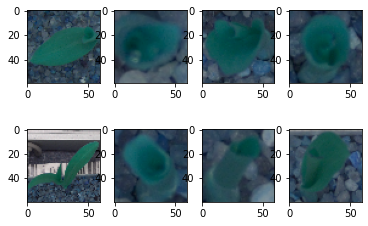

In [9]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(trainImg[i])

In [10]:
df.shape

(4750, 2)

In [11]:
trainImg.shape

(4750, 60, 60, 3)

Reshaping image array from 4d (RGB) to 2D 

In [12]:
trainImg1 = trainImg.reshape(4750,10800)
trainImg1

array([[ 41,  49,  56, ...,  21,  24,  60],
       [ 71,  83, 100, ...,  89, 110, 125],
       [ 45,  55,  72, ...,  64,  84, 101],
       ...,
       [ 27,  44,  83, ...,  62,  78,  96],
       [ 30,  74,  57, ..., 184, 176, 169],
       [ 47,  80, 106, ...,  40,  57,  79]], dtype=uint8)

Converting image array to Dataframe

In [13]:
trainImg1 = pd.DataFrame(trainImg1) 

In [14]:
trainImg1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10760,10761,10762,10763,10764,10765,10766,10767,10768,10769,10770,10771,10772,10773,10774,10775,10776,10777,10778,10779,10780,10781,10782,10783,10784,10785,10786,10787,10788,10789,10790,10791,10792,10793,10794,10795,10796,10797,10798,10799
0,41,49,56,33,39,44,31,32,42,45,59,75,50,60,77,42,66,84,43,66,80,45,61,75,50,65,86,61,76,95,61,77,95,59,73,94,50,68,93,40,...,152,105,123,107,44,64,84,43,62,77,39,54,73,35,62,88,32,56,84,51,71,94,32,57,83,37,61,93,31,62,85,23,36,74,60,66,90,21,24,60
1,71,83,100,71,84,99,71,84,97,70,83,94,70,82,94,63,74,88,68,79,93,71,81,95,72,82,96,70,81,94,67,78,91,64,75,88,55,67,81,40,...,96,56,67,82,34,46,70,28,39,66,36,50,74,49,69,86,71,92,105,78,101,114,75,100,114,74,99,115,75,100,116,76,101,118,92,114,130,89,110,125
2,45,55,72,55,68,83,63,76,91,45,53,67,48,52,64,42,48,61,48,55,70,45,53,66,49,57,71,68,79,92,71,82,92,68,77,87,61,68,77,45,...,67,55,70,83,77,93,105,76,93,106,73,90,102,80,93,106,98,109,120,95,105,118,93,105,119,87,103,115,77,94,107,69,85,103,63,81,102,64,84,101
3,48,69,86,46,68,85,45,68,84,52,71,87,58,73,90,64,75,93,63,74,92,58,69,87,58,70,88,52,65,83,43,59,78,41,60,79,40,59,78,40,...,90,48,62,84,45,58,80,37,51,74,32,48,73,29,47,74,25,47,73,29,51,76,35,57,80,38,60,83,46,69,90,55,76,95,60,80,97,61,81,96
4,171,169,173,173,169,173,177,173,174,175,173,176,174,172,175,182,176,181,176,175,176,187,184,184,178,176,179,177,177,177,174,175,177,168,164,168,169,170,172,173,...,71,33,31,72,84,93,108,56,69,83,43,54,68,43,66,83,41,54,73,48,72,95,55,75,94,50,72,89,73,85,97,68,74,85,63,76,87,83,100,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,49,75,103,20,46,83,39,94,143,57,70,85,81,106,123,60,75,90,53,66,83,33,44,63,46,52,73,28,77,62,38,58,70,58,81,96,76,89,107,62,...,48,46,44,52,42,43,52,39,38,51,41,43,49,41,45,52,47,51,54,52,55,62,59,62,66,61,65,71,147,146,149,206,205,203,205,204,204,205,204,203
4746,72,79,93,74,83,93,75,83,93,75,84,93,78,87,97,76,87,96,76,86,95,79,88,97,78,89,97,80,90,96,79,88,96,82,89,101,77,86,99,77,...,83,53,64,81,57,68,85,63,75,93,65,79,96,64,80,94,47,65,79,55,72,86,46,58,77,41,50,75,56,68,85,86,100,111,104,121,130,108,123,134
4747,27,44,83,23,40,82,23,37,79,19,35,74,23,37,73,25,38,73,21,33,65,26,39,67,37,53,76,47,66,84,55,74,93,54,76,95,56,78,96,58,...,81,26,47,79,32,51,83,30,48,77,34,52,79,50,69,90,54,75,93,55,77,94,55,75,94,54,71,92,61,75,95,63,74,94,61,73,93,62,78,96
4748,30,74,57,28,72,55,29,65,62,22,27,40,48,61,76,48,60,72,103,115,125,50,70,86,39,52,67,53,66,82,52,66,79,57,72,76,79,88,98,82,...,177,117,110,110,131,126,123,144,138,137,197,191,189,111,107,107,188,179,172,188,181,176,187,181,174,129,122,120,125,121,121,110,107,101,85,77,84,184,176,169


Renaming all columns with pixel_'n'

In [15]:
cols = list(trainImg1.columns)
trainImg1.rename(columns={cols[i]:'pixel_'+str(i) for i in range(len(cols)) } , inplace=True)
trainImg1

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_10760,pixel_10761,pixel_10762,pixel_10763,pixel_10764,pixel_10765,pixel_10766,pixel_10767,pixel_10768,pixel_10769,pixel_10770,pixel_10771,pixel_10772,pixel_10773,pixel_10774,pixel_10775,pixel_10776,pixel_10777,pixel_10778,pixel_10779,pixel_10780,pixel_10781,pixel_10782,pixel_10783,pixel_10784,pixel_10785,pixel_10786,pixel_10787,pixel_10788,pixel_10789,pixel_10790,pixel_10791,pixel_10792,pixel_10793,pixel_10794,pixel_10795,pixel_10796,pixel_10797,pixel_10798,pixel_10799
0,41,49,56,33,39,44,31,32,42,45,59,75,50,60,77,42,66,84,43,66,80,45,61,75,50,65,86,61,76,95,61,77,95,59,73,94,50,68,93,40,...,152,105,123,107,44,64,84,43,62,77,39,54,73,35,62,88,32,56,84,51,71,94,32,57,83,37,61,93,31,62,85,23,36,74,60,66,90,21,24,60
1,71,83,100,71,84,99,71,84,97,70,83,94,70,82,94,63,74,88,68,79,93,71,81,95,72,82,96,70,81,94,67,78,91,64,75,88,55,67,81,40,...,96,56,67,82,34,46,70,28,39,66,36,50,74,49,69,86,71,92,105,78,101,114,75,100,114,74,99,115,75,100,116,76,101,118,92,114,130,89,110,125
2,45,55,72,55,68,83,63,76,91,45,53,67,48,52,64,42,48,61,48,55,70,45,53,66,49,57,71,68,79,92,71,82,92,68,77,87,61,68,77,45,...,67,55,70,83,77,93,105,76,93,106,73,90,102,80,93,106,98,109,120,95,105,118,93,105,119,87,103,115,77,94,107,69,85,103,63,81,102,64,84,101
3,48,69,86,46,68,85,45,68,84,52,71,87,58,73,90,64,75,93,63,74,92,58,69,87,58,70,88,52,65,83,43,59,78,41,60,79,40,59,78,40,...,90,48,62,84,45,58,80,37,51,74,32,48,73,29,47,74,25,47,73,29,51,76,35,57,80,38,60,83,46,69,90,55,76,95,60,80,97,61,81,96
4,171,169,173,173,169,173,177,173,174,175,173,176,174,172,175,182,176,181,176,175,176,187,184,184,178,176,179,177,177,177,174,175,177,168,164,168,169,170,172,173,...,71,33,31,72,84,93,108,56,69,83,43,54,68,43,66,83,41,54,73,48,72,95,55,75,94,50,72,89,73,85,97,68,74,85,63,76,87,83,100,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,49,75,103,20,46,83,39,94,143,57,70,85,81,106,123,60,75,90,53,66,83,33,44,63,46,52,73,28,77,62,38,58,70,58,81,96,76,89,107,62,...,48,46,44,52,42,43,52,39,38,51,41,43,49,41,45,52,47,51,54,52,55,62,59,62,66,61,65,71,147,146,149,206,205,203,205,204,204,205,204,203
4746,72,79,93,74,83,93,75,83,93,75,84,93,78,87,97,76,87,96,76,86,95,79,88,97,78,89,97,80,90,96,79,88,96,82,89,101,77,86,99,77,...,83,53,64,81,57,68,85,63,75,93,65,79,96,64,80,94,47,65,79,55,72,86,46,58,77,41,50,75,56,68,85,86,100,111,104,121,130,108,123,134
4747,27,44,83,23,40,82,23,37,79,19,35,74,23,37,73,25,38,73,21,33,65,26,39,67,37,53,76,47,66,84,55,74,93,54,76,95,56,78,96,58,...,81,26,47,79,32,51,83,30,48,77,34,52,79,50,69,90,54,75,93,55,77,94,55,75,94,54,71,92,61,75,95,63,74,94,61,73,93,62,78,96
4748,30,74,57,28,72,55,29,65,62,22,27,40,48,61,76,48,60,72,103,115,125,50,70,86,39,52,67,53,66,82,52,66,79,57,72,76,79,88,98,82,...,177,117,110,110,131,126,123,144,138,137,197,191,189,111,107,107,188,179,172,188,181,176,187,181,174,129,122,120,125,121,121,110,107,101,85,77,84,184,176,169


In [16]:
trainImg1.dtypes

pixel_0        uint8
pixel_1        uint8
pixel_2        uint8
pixel_3        uint8
pixel_4        uint8
               ...  
pixel_10795    uint8
pixel_10796    uint8
pixel_10797    uint8
pixel_10798    uint8
pixel_10799    uint8
Length: 10800, dtype: object

This code is meant to combine all columns and separate them via comma, but due to the extensive amount of columns, it is a time consuming process

In [17]:
#s=trainImg1.iloc[:,0:]
#s.notnull()
#s.notnull().dot(s.columns+',').str[:-1]
#trainImg1['actual_image']=s.notnull().dot(s.columns+',').str[:-1]

Concatinating the Image array into the dataframe

In [18]:
df1 = pd.concat([df, trainImg1], axis=1) 
df1

,image_species,image_label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,...,pixel_10760,pixel_10761,pixel_10762,pixel_10763,pixel_10764,pixel_10765,pixel_10766,pixel_10767,pixel_10768,pixel_10769,pixel_10770,pixel_10771,pixel_10772,pixel_10773,pixel_10774,pixel_10775,pixel_10776,pixel_10777,pixel_10778,pixel_10779,pixel_10780,pixel_10781,pixel_10782,pixel_10783,pixel_10784,pixel_10785,pixel_10786,pixel_10787,pixel_10788,pixel_10789,pixel_10790,pixel_10791,pixel_10792,pixel_10793,pixel_10794,pixel_10795,pixel_10796,pixel_10797,pixel_10798,pixel_10799
0,Maize,bf22827fb.png,41,49,56,33,39,44,31,32,42,45,59,75,50,60,77,42,66,84,43,66,80,45,61,75,50,65,86,61,76,95,61,77,95,59,73,94,50,68,...,152,105,123,107,44,64,84,43,62,77,39,54,73,35,62,88,32,56,84,51,71,94,32,57,83,37,61,93,31,62,85,23,36,74,60,66,90,21,24,60
1,Maize,1898398b8.png,71,83,100,71,84,99,71,84,97,70,83,94,70,82,94,63,74,88,68,79,93,71,81,95,72,82,96,70,81,94,67,78,91,64,75,88,55,67,...,96,56,67,82,34,46,70,28,39,66,36,50,74,49,69,86,71,92,105,78,101,114,75,100,114,74,99,115,75,100,116,76,101,118,92,114,130,89,110,125
2,Maize,d3cf21397.png,45,55,72,55,68,83,63,76,91,45,53,67,48,52,64,42,48,61,48,55,70,45,53,66,49,57,71,68,79,92,71,82,92,68,77,87,61,68,...,67,55,70,83,77,93,105,76,93,106,73,90,102,80,93,106,98,109,120,95,105,118,93,105,119,87,103,115,77,94,107,69,85,103,63,81,102,64,84,101
3,Maize,9d1e59e00.png,48,69,86,46,68,85,45,68,84,52,71,87,58,73,90,64,75,93,63,74,92,58,69,87,58,70,88,52,65,83,43,59,78,41,60,79,40,59,...,90,48,62,84,45,58,80,37,51,74,32,48,73,29,47,74,25,47,73,29,51,76,35,57,80,38,60,83,46,69,90,55,76,95,60,80,97,61,81,96
4,Maize,f4dd93492.png,171,169,173,173,169,173,177,173,174,175,173,176,174,172,175,182,176,181,176,175,176,187,184,184,178,176,179,177,177,177,174,175,177,168,164,168,169,170,...,71,33,31,72,84,93,108,56,69,83,43,54,68,43,66,83,41,54,73,48,72,95,55,75,94,50,72,89,73,85,97,68,74,85,63,76,87,83,100,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,Scentless Mayweed,4408bae35.png,49,75,103,20,46,83,39,94,143,57,70,85,81,106,123,60,75,90,53,66,83,33,44,63,46,52,73,28,77,62,38,58,70,58,81,96,76,89,...,48,46,44,52,42,43,52,39,38,51,41,43,49,41,45,52,47,51,54,52,55,62,59,62,66,61,65,71,147,146,149,206,205,203,205,204,204,205,204,203
4746,Scentless Mayweed,b349deff8.png,72,79,93,74,83,93,75,83,93,75,84,93,78,87,97,76,87,96,76,86,95,79,88,97,78,89,97,80,90,96,79,88,96,82,89,101,77,86,...,83,53,64,81,57,68,85,63,75,93,65,79,96,64,80,94,47,65,79,55,72,86,46,58,77,41,50,75,56,68,85,86,100,111,104,121,130,108,123,134
4747,Scentless Mayweed,f86cff347.png,27,44,83,23,40,82,23,37,79,19,35,74,23,37,73,25,38,73,21,33,65,26,39,67,37,53,76,47,66,84,55,74,93,54,76,95,56,78,...,81,26,47,79,32,51,83,30,48,77,34,52,79,50,69,90,54,75,93,55,77,94,55,75,94,54,71,92,61,75,95,63,74,94,61,73,93,62,78,96
4748,Scentless Mayweed,192bf26cb.png,30,74,57,28,72,55,29,65,62,22,27,40,48,61,76,48,60,72,103,115,125,50,70,86,39,52,67,53,66,82,52,66,79,57,72,76,79,88,...,177,117,110,110,131,126,123,144,138,137,197,191,189,111,107,107,188,179,172,188,181,176,187,181,174,129,122,120,125,121,121,110,107,101,85,77,84,184,176,169


Count of all species images in the Dataset

In [19]:
dup_count = df.pivot_table(columns=['image_species'], aggfunc='size')
print (dup_count)

image_species
Black-grass                  263
Charlock                     390
Cleavers                     287
Common Chickweed             611
Common wheat                 221
Fat Hen                      475
Loose Silky-bent             654
Maize                        221
Scentless Mayweed            516
Shepherds Purse              231
Small-flowered Cranesbill    496
Sugar beet                   385
dtype: int64


In [20]:
dup_count.sum().sum() #Total number of Species 

4750

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b> C. Write a function that will select n random images and display images along with its species.</b>

Using ImageDataGenerator, the train data path is retraced along with the classnames for label association with the image

In [21]:

path1 = '/content/plant-seedlings-classification/train' 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=path1,
                                                                 label_mode="categorical", 
                                                                 shuffle=True,
                                                                 image_size=(60,60),
                                                                batch_size = 35,
                                                                 seed=2,
                                                                validation_split=0.2,
                                                                   subset="training")

class_names = train_data.class_names
class_names

Found 4750 files belonging to 12 classes.
Using 3800 files for training.


['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

Loop to print 'n' random images 

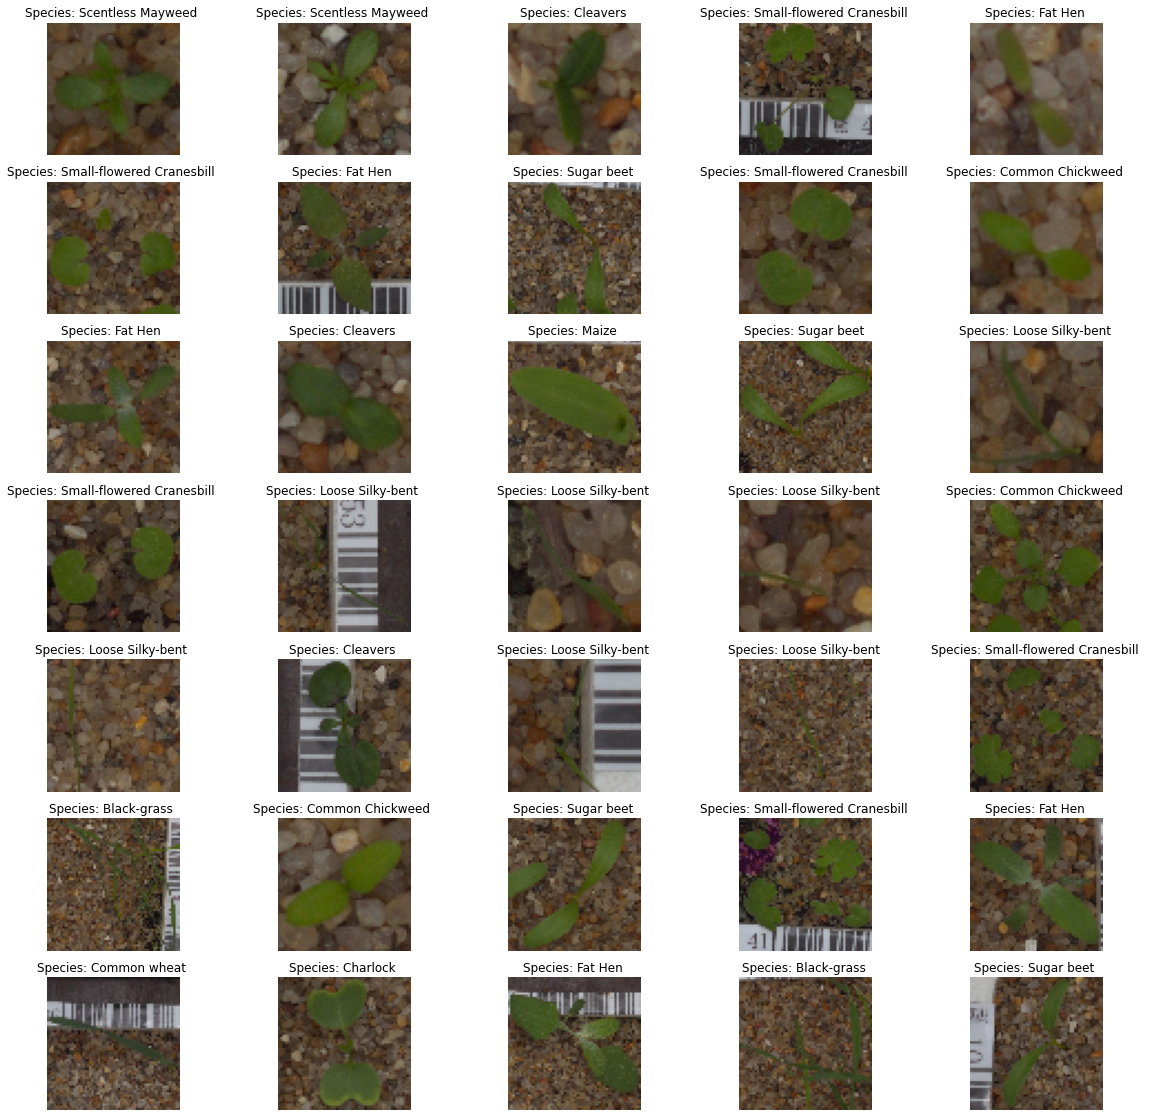

In [22]:
plt.figure(figsize = (20,20)) 
image, label = next(iter(train_data))

# Defining a function to input number of random images to be printed
def random(n):
  for i in range(0,n) : 
      ax = plt.subplot(7,5,i+1) 
      plt.imshow(image[i]/255.)
      plt.title(f"Species: {class_names[tf.argmax(label[i])]} ")
      ax.axis("off")
      
# The limit being 35 as the batch size is set to 35, more images can be displayed on increasing the batch size
random1 = random(35)
random1

<font size="5"><p style="color:black"> <b> 2. Data preprocessing</p></font>

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b> A. Create X & Y from the DataFrame. </b>

In [23]:
X = df1[['image_species']]
y = df1.loc[:,'pixel_0':]

In [24]:
X

,image_species
0,Maize
1,Maize
2,Maize
3,Maize
4,Maize
...,...
4745,Scentless Mayweed
4746,Scentless Mayweed
4747,Scentless Mayweed
4748,Scentless Mayweed


In [25]:
y

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_10760,pixel_10761,pixel_10762,pixel_10763,pixel_10764,pixel_10765,pixel_10766,pixel_10767,pixel_10768,pixel_10769,pixel_10770,pixel_10771,pixel_10772,pixel_10773,pixel_10774,pixel_10775,pixel_10776,pixel_10777,pixel_10778,pixel_10779,pixel_10780,pixel_10781,pixel_10782,pixel_10783,pixel_10784,pixel_10785,pixel_10786,pixel_10787,pixel_10788,pixel_10789,pixel_10790,pixel_10791,pixel_10792,pixel_10793,pixel_10794,pixel_10795,pixel_10796,pixel_10797,pixel_10798,pixel_10799
0,41,49,56,33,39,44,31,32,42,45,59,75,50,60,77,42,66,84,43,66,80,45,61,75,50,65,86,61,76,95,61,77,95,59,73,94,50,68,93,40,...,152,105,123,107,44,64,84,43,62,77,39,54,73,35,62,88,32,56,84,51,71,94,32,57,83,37,61,93,31,62,85,23,36,74,60,66,90,21,24,60
1,71,83,100,71,84,99,71,84,97,70,83,94,70,82,94,63,74,88,68,79,93,71,81,95,72,82,96,70,81,94,67,78,91,64,75,88,55,67,81,40,...,96,56,67,82,34,46,70,28,39,66,36,50,74,49,69,86,71,92,105,78,101,114,75,100,114,74,99,115,75,100,116,76,101,118,92,114,130,89,110,125
2,45,55,72,55,68,83,63,76,91,45,53,67,48,52,64,42,48,61,48,55,70,45,53,66,49,57,71,68,79,92,71,82,92,68,77,87,61,68,77,45,...,67,55,70,83,77,93,105,76,93,106,73,90,102,80,93,106,98,109,120,95,105,118,93,105,119,87,103,115,77,94,107,69,85,103,63,81,102,64,84,101
3,48,69,86,46,68,85,45,68,84,52,71,87,58,73,90,64,75,93,63,74,92,58,69,87,58,70,88,52,65,83,43,59,78,41,60,79,40,59,78,40,...,90,48,62,84,45,58,80,37,51,74,32,48,73,29,47,74,25,47,73,29,51,76,35,57,80,38,60,83,46,69,90,55,76,95,60,80,97,61,81,96
4,171,169,173,173,169,173,177,173,174,175,173,176,174,172,175,182,176,181,176,175,176,187,184,184,178,176,179,177,177,177,174,175,177,168,164,168,169,170,172,173,...,71,33,31,72,84,93,108,56,69,83,43,54,68,43,66,83,41,54,73,48,72,95,55,75,94,50,72,89,73,85,97,68,74,85,63,76,87,83,100,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,49,75,103,20,46,83,39,94,143,57,70,85,81,106,123,60,75,90,53,66,83,33,44,63,46,52,73,28,77,62,38,58,70,58,81,96,76,89,107,62,...,48,46,44,52,42,43,52,39,38,51,41,43,49,41,45,52,47,51,54,52,55,62,59,62,66,61,65,71,147,146,149,206,205,203,205,204,204,205,204,203
4746,72,79,93,74,83,93,75,83,93,75,84,93,78,87,97,76,87,96,76,86,95,79,88,97,78,89,97,80,90,96,79,88,96,82,89,101,77,86,99,77,...,83,53,64,81,57,68,85,63,75,93,65,79,96,64,80,94,47,65,79,55,72,86,46,58,77,41,50,75,56,68,85,86,100,111,104,121,130,108,123,134
4747,27,44,83,23,40,82,23,37,79,19,35,74,23,37,73,25,38,73,21,33,65,26,39,67,37,53,76,47,66,84,55,74,93,54,76,95,56,78,96,58,...,81,26,47,79,32,51,83,30,48,77,34,52,79,50,69,90,54,75,93,55,77,94,55,75,94,54,71,92,61,75,95,63,74,94,61,73,93,62,78,96
4748,30,74,57,28,72,55,29,65,62,22,27,40,48,61,76,48,60,72,103,115,125,50,70,86,39,52,67,53,66,82,52,66,79,57,72,76,79,88,98,82,...,177,117,110,110,131,126,123,144,138,137,197,191,189,111,107,107,188,179,172,188,181,176,187,181,174,129,122,120,125,121,121,110,107,101,85,77,84,184,176,169


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b> B. Encode labels of the images.  </b>

Label Encoding image label to get an encoded representation of images

In [26]:
X

,image_species
0,Maize
1,Maize
2,Maize
3,Maize
4,Maize
...,...
4745,Scentless Mayweed
4746,Scentless Mayweed
4747,Scentless Mayweed
4748,Scentless Mayweed


In [27]:
X = np.array(X.values.tolist())  

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer = MultiLabelBinarizer()
X = pd.DataFrame(binarizer.fit_transform(X), columns=binarizer.classes_)
X

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4745,0,0,0,0,0,0,0,0,1,0,0,0
4746,0,0,0,0,0,0,0,0,1,0,0,0
4747,0,0,0,0,0,0,0,0,1,0,0,0
4748,0,0,0,0,0,0,0,0,1,0,0,0


* From this, we know that 0 to 11 columns are the labels in this order:

>0 - Black-grass	

>1- Charlock	

>2 - Cleavers	

>3 - Common Chickweed

>4 - Common wheat

>5 - Fat Hen

>6 - Loose Silky-bent

>7 - Maize	Scentless

>8 - Mayweed

>9 - Shepherds Purse

>10 - Small-flowered Cranesbill

>11 - Sugar beet


In [29]:
X = np.array(X.values.tolist())  

In [30]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
temp3 = pd.DataFrame(X) 
temp3

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4745,0,0,0,0,0,0,0,0,1,0,0,0
4746,0,0,0,0,0,0,0,0,1,0,0,0
4747,0,0,0,0,0,0,0,0,1,0,0,0
4748,0,0,0,0,0,0,0,0,1,0,0,0


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b> C. Unify shape of all the images.   </b>

Converting Dataframe back to array by unifying all pixels via reshaping

In [32]:
y.shape

(4750, 10800)

In [33]:
y

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_10760,pixel_10761,pixel_10762,pixel_10763,pixel_10764,pixel_10765,pixel_10766,pixel_10767,pixel_10768,pixel_10769,pixel_10770,pixel_10771,pixel_10772,pixel_10773,pixel_10774,pixel_10775,pixel_10776,pixel_10777,pixel_10778,pixel_10779,pixel_10780,pixel_10781,pixel_10782,pixel_10783,pixel_10784,pixel_10785,pixel_10786,pixel_10787,pixel_10788,pixel_10789,pixel_10790,pixel_10791,pixel_10792,pixel_10793,pixel_10794,pixel_10795,pixel_10796,pixel_10797,pixel_10798,pixel_10799
0,41,49,56,33,39,44,31,32,42,45,59,75,50,60,77,42,66,84,43,66,80,45,61,75,50,65,86,61,76,95,61,77,95,59,73,94,50,68,93,40,...,152,105,123,107,44,64,84,43,62,77,39,54,73,35,62,88,32,56,84,51,71,94,32,57,83,37,61,93,31,62,85,23,36,74,60,66,90,21,24,60
1,71,83,100,71,84,99,71,84,97,70,83,94,70,82,94,63,74,88,68,79,93,71,81,95,72,82,96,70,81,94,67,78,91,64,75,88,55,67,81,40,...,96,56,67,82,34,46,70,28,39,66,36,50,74,49,69,86,71,92,105,78,101,114,75,100,114,74,99,115,75,100,116,76,101,118,92,114,130,89,110,125
2,45,55,72,55,68,83,63,76,91,45,53,67,48,52,64,42,48,61,48,55,70,45,53,66,49,57,71,68,79,92,71,82,92,68,77,87,61,68,77,45,...,67,55,70,83,77,93,105,76,93,106,73,90,102,80,93,106,98,109,120,95,105,118,93,105,119,87,103,115,77,94,107,69,85,103,63,81,102,64,84,101
3,48,69,86,46,68,85,45,68,84,52,71,87,58,73,90,64,75,93,63,74,92,58,69,87,58,70,88,52,65,83,43,59,78,41,60,79,40,59,78,40,...,90,48,62,84,45,58,80,37,51,74,32,48,73,29,47,74,25,47,73,29,51,76,35,57,80,38,60,83,46,69,90,55,76,95,60,80,97,61,81,96
4,171,169,173,173,169,173,177,173,174,175,173,176,174,172,175,182,176,181,176,175,176,187,184,184,178,176,179,177,177,177,174,175,177,168,164,168,169,170,172,173,...,71,33,31,72,84,93,108,56,69,83,43,54,68,43,66,83,41,54,73,48,72,95,55,75,94,50,72,89,73,85,97,68,74,85,63,76,87,83,100,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,49,75,103,20,46,83,39,94,143,57,70,85,81,106,123,60,75,90,53,66,83,33,44,63,46,52,73,28,77,62,38,58,70,58,81,96,76,89,107,62,...,48,46,44,52,42,43,52,39,38,51,41,43,49,41,45,52,47,51,54,52,55,62,59,62,66,61,65,71,147,146,149,206,205,203,205,204,204,205,204,203
4746,72,79,93,74,83,93,75,83,93,75,84,93,78,87,97,76,87,96,76,86,95,79,88,97,78,89,97,80,90,96,79,88,96,82,89,101,77,86,99,77,...,83,53,64,81,57,68,85,63,75,93,65,79,96,64,80,94,47,65,79,55,72,86,46,58,77,41,50,75,56,68,85,86,100,111,104,121,130,108,123,134
4747,27,44,83,23,40,82,23,37,79,19,35,74,23,37,73,25,38,73,21,33,65,26,39,67,37,53,76,47,66,84,55,74,93,54,76,95,56,78,96,58,...,81,26,47,79,32,51,83,30,48,77,34,52,79,50,69,90,54,75,93,55,77,94,55,75,94,54,71,92,61,75,95,63,74,94,61,73,93,62,78,96
4748,30,74,57,28,72,55,29,65,62,22,27,40,48,61,76,48,60,72,103,115,125,50,70,86,39,52,67,53,66,82,52,66,79,57,72,76,79,88,98,82,...,177,117,110,110,131,126,123,144,138,137,197,191,189,111,107,107,188,179,172,188,181,176,187,181,174,129,122,120,125,121,121,110,107,101,85,77,84,184,176,169


In [34]:
res= np.array(y.values.tolist())  

In [35]:
Y = res.reshape((4750, 60, 60, 3))
Y.shape

(4750, 60, 60, 3)

In [36]:
Y

array([[[[ 41,  49,  56],
         [ 33,  39,  44],
         [ 31,  32,  42],
         ...,
         [ 56,  86, 107],
         [ 55,  86, 104],
         [ 47,  68,  80]],

        [[ 23,  25,  31],
         [ 26,  30,  36],
         [ 26,  32,  52],
         ...,
         [ 55,  89, 112],
         [ 58,  87, 113],
         [ 50,  86,  95]],

        [[ 55,  68,  78],
         [ 31,  40,  62],
         [ 47,  58,  76],
         ...,
         [ 54,  86, 113],
         [ 66,  96, 103],
         [ 47,  82,  90]],

        ...,

        [[ 63,  75,  91],
         [ 79,  92,  95],
         [ 49,  65,  76],
         ...,
         [ 42,  75, 107],
         [ 35,  44,  74],
         [ 36,  46,  78]],

        [[ 67,  80,  93],
         [ 64,  76,  84],
         [ 54,  66,  71],
         ...,
         [ 15,  42,  67],
         [ 49,  55,  78],
         [ 52,  59,  87]],

        [[ 51,  70,  85],
         [ 54,  68,  79],
         [ 43,  56,  57],
         ...,
         [ 23,  36,  74],
        

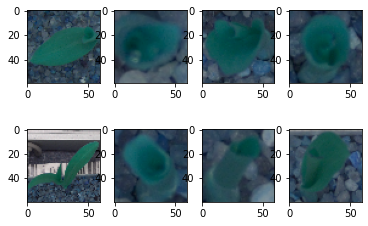

In [37]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(Y[i])

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b> D. Normalise all the images.   </b>

In [38]:
print(Y.max()) # maximum of Y
print(Y.min()) # minimum of Y

Y = Y / 255.0

print(Y.max()) # maximum of Y1 (normalized Y)
print(Y.min()) # minimum of Y1 (normalized Y)

255
0
1.0
0.0


In [39]:
Y

array([[[[0.16078431, 0.19215686, 0.21960784],
         [0.12941176, 0.15294118, 0.17254902],
         [0.12156863, 0.1254902 , 0.16470588],
         ...,
         [0.21960784, 0.3372549 , 0.41960784],
         [0.21568627, 0.3372549 , 0.40784314],
         [0.18431373, 0.26666667, 0.31372549]],

        [[0.09019608, 0.09803922, 0.12156863],
         [0.10196078, 0.11764706, 0.14117647],
         [0.10196078, 0.1254902 , 0.20392157],
         ...,
         [0.21568627, 0.34901961, 0.43921569],
         [0.22745098, 0.34117647, 0.44313725],
         [0.19607843, 0.3372549 , 0.37254902]],

        [[0.21568627, 0.26666667, 0.30588235],
         [0.12156863, 0.15686275, 0.24313725],
         [0.18431373, 0.22745098, 0.29803922],
         ...,
         [0.21176471, 0.3372549 , 0.44313725],
         [0.25882353, 0.37647059, 0.40392157],
         [0.18431373, 0.32156863, 0.35294118]],

        ...,

        [[0.24705882, 0.29411765, 0.35686275],
         [0.30980392, 0.36078431, 0.37254902]

<font size="5"><p style="color:black"> <b> 3. Model training</p></font>

Graph to understand the distribution of species images: checking for class imabalance

In [40]:
imgsp = df1[['image_species']]


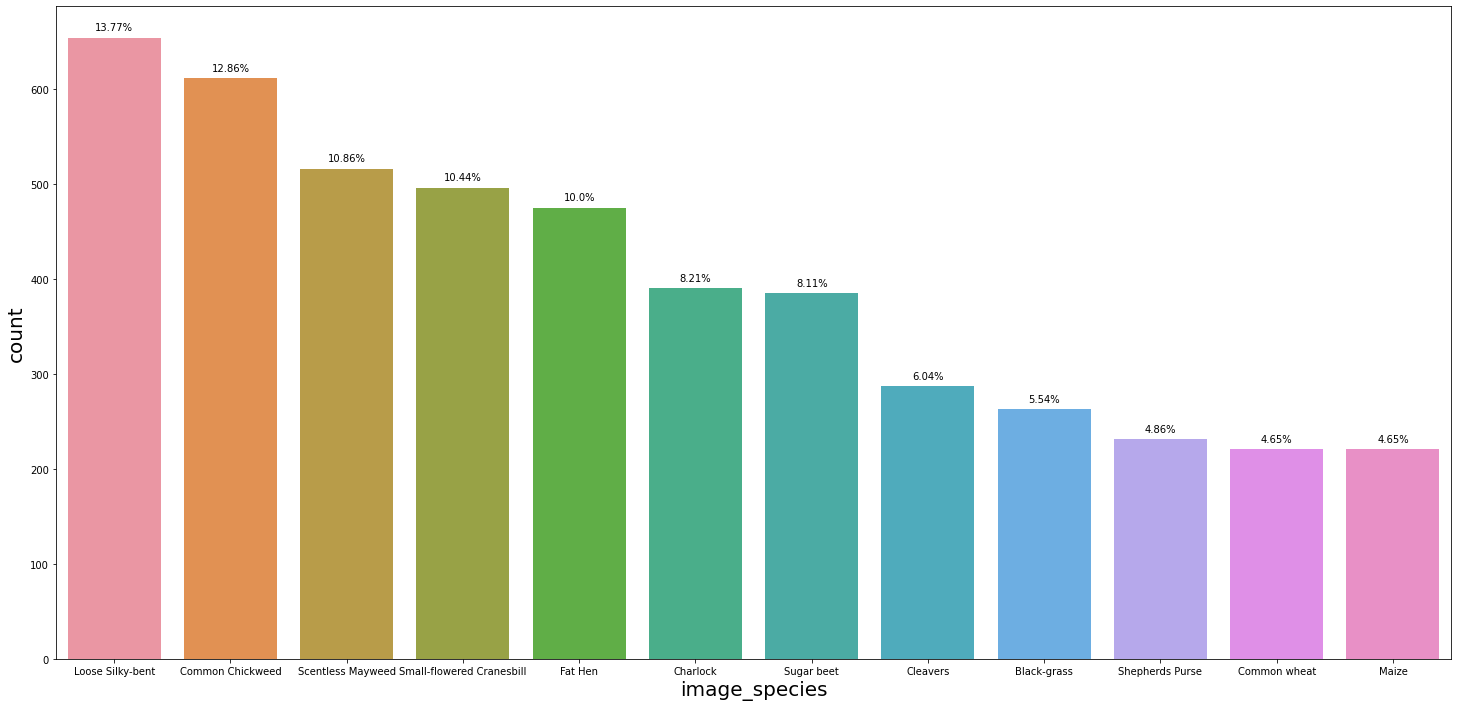

In [41]:
# Frequency of occurence of classes
fig, ax = plt.subplots(figsize=(4,4))
width = len(imgsp['image_species'].unique()) + 13
fig.set_size_inches(width , 12)
ax=sns.countplot(data = imgsp, x= 'image_species',order = imgsp['image_species'].value_counts().index)
plt.xlabel("image_species",fontsize=20)
plt.ylabel("count", fontsize=20)
for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(imgsp)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* As there are different counts of images of different species, hence there is data unbalance

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b> A. Split the data into train and test data.   </b>

* Splitting the data into 90% training and 10% testing data (validation). 

* Since the data is unbalanced to avoid inaccurate prediction, stratify = X is done

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Y,X, train_size = 0.9, test_size=0.1, random_state = 12, stratify = X)

Checking shape of train and test datasets

In [43]:
# Checking shape of Train dataset (90%)
print(x_train.shape) 
print(y_train.shape) 

(4275, 60, 60, 3)
(4275, 12)


In [44]:
# Checking shape of Test dataset (10%)
print(x_test.shape)
print(y_test.shape)

(475, 60, 60, 3)
(475, 12)


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b> B. Create new CNN architecture to train the model.   </b>

Data augmentation to avoid overfitting 

In [45]:
datagen = ImageDataGenerator(rotation_range=40, zoom_range = 0.2, width_shift_range=0.2, height_shift_range=0.2,horizontal_flip=True, vertical_flip=True)
datagen.fit(x_train)

Creating CNN architecture under a class function 

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import models, layers, callbacks

        
model = Sequential()

model.add(layers.Conv2D(50, (3, 3), input_shape=(60,60,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(70, (3, 3), activation='LeakyReLU'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(120, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(256, (3, 3), activation='LeakyReLU'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(12, activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 50)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 29, 29, 50)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 70)        31570     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 70)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 70)        0

* Here, we have 16 layers out of which 4 are Conv2D, 4 are MaxPooling2D, 6 are Dropout, 2 Dense layers, and 1 Flatten layer.

* The model is fit with augmented images to reduce overfitting, also dropout is carried out to further reduce overall overfitting of model

<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b> C. Train the model on train data and validate on test data.  </b>

* Here, we select 'binary cross entropy' as the loss function and optimizer 'Adam' as it performed better than 'stochastic gradient descent (sgd)' optimizer

* We selected 50 epochs to get a good idea of the model

In [48]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    
# Fit the model
hist = model.fit(datagen.flow(x_train, y_train, batch_size=30), epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
143/143 [==============================] - 47s 323ms/step - loss: 0.3058 - accuracy: 0.1240 - val_loss: 0.2670 - val_accuracy: 0.2463
Epoch 2/50
143/143 [==============================] - 43s 303ms/step - loss: 0.2515 - accuracy: 0.2674 - val_loss: 0.2199 - val_accuracy: 0.4274
Epoch 3/50
143/143 [==============================] - 43s 301ms/step - loss: 0.2279 - accuracy: 0.3504 - val_loss: 0.1954 - val_accuracy: 0.4484
Epoch 4/50
143/143 [==============================] - 43s 301ms/step - loss: 0.2064 - accuracy: 0.4225 - val_loss: 0.1808 - val_accuracy: 0.5389
Epoch 5/50
143/143 [==============================] - 43s 301ms/step - loss: 0.1977 - accuracy: 0.4596 - val_loss: 0.1676 - val_accuracy: 0.5579
Epoch 6/50
143/143 [==============================] - 43s 301ms/step - loss: 0.1883 - accuracy: 0.4912 - val_loss: 0.1513 - val_accuracy: 0.6042
Epoch 7/50
143/143 [==============================] - 44s 308ms/step - loss: 0.1795 - accuracy: 0.5200 - val_loss: 0.1466 - val_ac

Accuracy metrics

In [49]:
train_accuracy= model.evaluate(x_train, y_train, verbose=0)
test_accuracy= model.evaluate(x_test, y_test, verbose=0)

print('Train accuracy: ', train_accuracy)
print('Test/Validation accuracy: ',test_accuracy)

Train accuracy:  [0.03950458765029907, 0.9012865424156189]
Test/Validation accuracy:  [0.041753388941287994, 0.8926315903663635]


* The train accuracy of 90.1% and validation accuracy of 89.26% is a good score for the prediction of plant seedlings

Pickling the model for future usage

In [50]:
from keras.models import model_from_json

# Pickle model to JSON
classifier_model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(classifier_model_json)
# Pickle weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


<span style="font-family: Arial; font-weight:bold;font-size:1.3em;color:#00b3e5;"> <b>D. Select a random image and print actual label and predicted label for the same.  </b>

In [51]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [52]:
temp1 = pd.DataFrame(y_test) 
temp1

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
470,1,0,0,0,0,0,0,0,0,0,0,0
471,0,0,0,0,0,0,0,0,1,0,0,0
472,0,0,0,1,0,0,0,0,0,0,0,0
473,0,0,0,0,0,0,0,0,1,0,0,0


In [53]:
from tensorflow.keras.models import Sequential
y_predict = np.argmax(model.predict(x_test), axis=-1)

In [54]:
temp2 = pd.DataFrame(y_predict) 
temp2

,0
0,7
1,5
2,8
3,3
4,6
...,...
470,6
471,8
472,3
473,8


Image label prediction 

* From this, we know that 0 to 11 columns are the labels in this order:

>0 - Black-grass	

>1- Charlock	

>2 - Cleavers	

>3 - Common Chickweed

>4 - Common wheat

>5 - Fat Hen

>6 - Loose Silky-bent

>7 - Maize	Scentless

>8 - Mayweed

>9 - Shepherds Purse

>10 - Small-flowered Cranesbill

>11 - Sugar beet


Actual Label:  [0 0 0 0 0 0 0 0 1 0 0 0]
Predicted Label 8


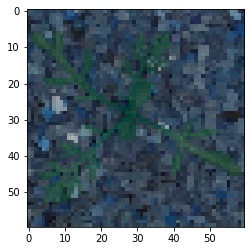

In [55]:
print("Actual Label: ", y_test[2])
print("Predicted Label", y_predict[2])
plt.imshow(x_test[2])

Actual Label:  [0 0 0 0 0 1 0 0 0 0 0 0]
Predicted Label 5


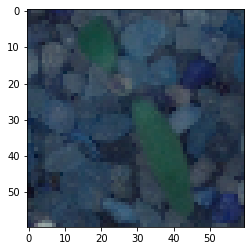

In [56]:
print("Actual Label: ", y_test[345])
print("Predicted Label", y_predict[345])
plt.imshow(x_test[345])

Actual Label:  [0 0 0 0 0 0 0 0 0 1 0 0]
Predicted Label 9


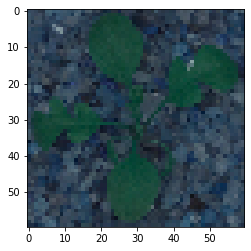

In [57]:
print("Actual Label: ", y_test[64])
print("Predicted Label", y_predict[64])
plt.imshow(x_test[64])

All the predictions are accurate, hence, this model is viable for production